<a href="https://colab.research.google.com/github/imranrahman1997/Neural-Network-from-scratch/blob/main/Learn_Neural_Network_From_Scratch_Regression_Problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regression model with housing dataset

In [1]:
from keras.datasets import boston_housing
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

57344/57026 [==============================] - 0s 0us/step


In [2]:
train_data.shape

(404, 13)

In [3]:
train_targets.shape

(404,)

In [4]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

The targets are the median values of owner-occupied homes, in thousands of
dollars

In [5]:
test_data.shape

(102, 13)

We have 404 trainig samples and 102 test samples.Each have 13 numerical freatures, such as per capita crime rate, average number of rooms per dwelling.

#Normalizing data  
best practice to deal with such data is to do feature-wise normalization: for each feature in the input
data (a column in the input data matrix), you subtract the mean of the feature and divide by the standard deviation, so that the feature is centered around 0 and has a unit standard deviation

In [6]:
mean = train_data.mean(axis = 0)
train_data -= mean

In [7]:
train_data

array([[ -2.51264057, -11.48019802,  -2.96443069, ...,   2.5240099 ,
         42.11683168,   5.97918317],
       [ -3.72334057,  71.01980198,  -9.07443069, ...,  -3.7759901 ,
         40.59683168,  -9.63081683],
       [  1.15310943, -11.48019802,   6.99556931, ...,   1.7240099 ,
         20.73683168,  -9.48081683],
       ...,
       [ -3.71045057,  23.51980198,  -5.04443069, ...,  -1.5759901 ,
          7.46683168,  -4.91081683],
       [ -1.59593057, -11.48019802,   8.47556931, ...,  -3.7759901 ,
        -92.83316832,   3.04918317],
       [ -3.73072057,  48.51980198,  -8.17443069, ...,  -2.8759901 ,
         21.91683168,  -8.36081683]])

In [8]:
std = train_data.std(axis = 0)
train_data /= std

In [9]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [10]:
test_data -= mean
test_data /= std

In [11]:
from keras import models
from keras import layers

In [12]:
def build_model():
  model = models.Sequential()
  model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
  model.add(layers.Dense(64, activation = 'relu'))
  model.add(layers.Dense(1))

  model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mae'])
  return model

The network ends with a single unit and no activation (it will be a linear layer)  
 if you applied a sigmoid activation function to the last layer,
the network could only learn to predict values between 0 and 1.  
 because the last
layer is purely linear, the network is free to learn to predict values in any range.

#K-Fold validation
our data set too small so have to use k-fold validation for better accuracy

In [13]:
import numpy as np
k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
  print('processing fold #', i)

  #creat validation data
  val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
  val_targets = train_targets[i * num_val_samples : (i + 1) * num_val_samples]

  #prepare the training data from all other partitions
  partial_train_data = np.concatenate(
      [train_data [: i * num_val_samples],
       train_data[(i + 1) * num_val_samples:]], axis = 0
  )
  partical_train_targets = np.concatenate(
      [train_targets[: i * num_val_samples],
       train_targets[(i + 1) * num_val_samples : ]], axis = 0
  )

  model = build_model()
  model.fit(partial_train_data, partical_train_targets,
  epochs=num_epochs, batch_size=1, verbose=0)
          #training model in silent mode, verbose = 0, 
          # N.B = verbose = 1, which includes both progress bar and one line per epoch. 
  
  val_mse, val_mae = model.evaluate(val_data, val_targets, verbose  = 0)
  all_scores.append(val_mae)

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


In [14]:
all_scores

[2.0347952842712402, 2.6224942207336426, 2.4992644786834717, 2.543034553527832]

In [15]:
np.mean(all_scores)

2.4248971343040466

**Saving the validation logs at each fold**

In [16]:
num_epochs = 500
all_mae_histories = []
for i in range(k):
  print("Processing fold #", i)
  val_data = train_data[i * num_val_samples : (i + 1) * num_val_samples]
  val_targets = train_data[i * num_val_samples : (i + 1) * num_val_samples]

  partial_train_data = np.concatenate(
      [train_data[: i * num_val_samples],
       train_data[(i + 1) * num_val_samples :]], axis  = 0
  )
  partial_train_targets = np.concatenate(
      [train_targets[: i * num_val_samples],
       train_targets[(i + 1) * num_val_samples : ]], axis = 0
  )

  model = build_model()
  history = model.fit(partial_train_data,
                      partial_train_targets,
                      epochs = num_epochs, 
                      batch_size = 1,
                      validation_data=(val_data, val_targets),
                      verbose = 0)
  mae_history = history.history['val_mae']
  all_mae_histories.append(mae_history)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [17]:
average_mae_history = [
np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

In [18]:
average_mae_history

[21.42952585220337,
 21.71549701690674,
 22.18444538116455,
 21.97840452194214,
 22.130508422851562,
 22.250897884368896,
 22.349036693572998,
 21.980711460113525,
 22.6274094581604,
 22.33943462371826,
 22.115399837493896,
 22.184070587158203,
 21.768049716949463,
 22.63971710205078,
 22.262359619140625,
 21.983766555786133,
 22.006627559661865,
 22.141732692718506,
 22.60802984237671,
 22.65295648574829,
 22.697837829589844,
 22.658621311187744,
 22.30944013595581,
 22.6091365814209,
 22.167248249053955,
 21.92361068725586,
 22.221916675567627,
 22.2739896774292,
 22.82641077041626,
 22.31596565246582,
 22.364311695098877,
 22.611276626586914,
 22.71634578704834,
 22.795910358428955,
 22.2254958152771,
 22.584672927856445,
 23.09515905380249,
 22.65584659576416,
 22.468739986419678,
 22.847431659698486,
 22.976502895355225,
 22.58002281188965,
 22.533719539642334,
 22.464800357818604,
 22.49246597290039,
 22.4424729347229,
 22.812474250793457,
 22.29149293899536,
 22.001486778259277,

Plotting validation scores

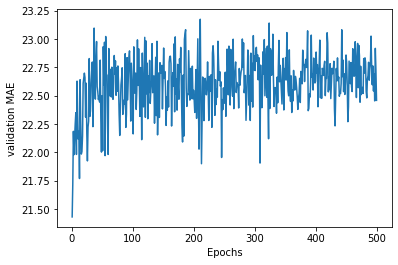

In [19]:
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel("validation MAE")
plt.show()

In [27]:
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

4/4 [==============================] - 0s 2ms/step - loss: 17.7355 - mae: 3.1767


In [28]:
test_mae_score

3.176658868789673